In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

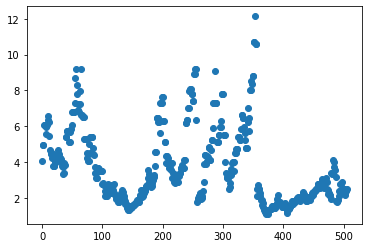

In [59]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

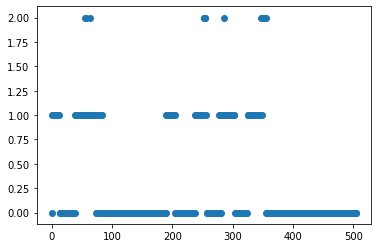

In [60]:
# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
# NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.cut(df.DIS, bins = 3, retbins = True, labels = [0,1,2]) 
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [61]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Equal-width


### Soru 

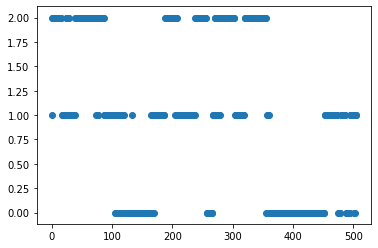

In [62]:
# aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.qcut(df.DIS, q = 3, retbins = True, labels = [0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [63]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Equal-frequency


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [64]:
df_FG = df.copy()
df_FG

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df_FG["DIS + PTRATIO"] = df_FG["DIS"] + df_FG["PTRATIO"] 

In [66]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df_FG["DIS - PTRATIO"] = df_FG["DIS"] - df_FG["PTRATIO"] 

In [67]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df_FG["DIS / PTRATIO"] = df_FG["DIS"] / df_FG["PTRATIO"] 

In [68]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df_FG["DIS * PTRATIO"] = df_FG["DIS"] * df_FG["PTRATIO"] 

In [69]:
df_FG.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,DIS + PTRATIO,DIS - PTRATIO,DIS / PTRATIO,DIS * PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,19.3900,-11.2100,0.267320,62.57700
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,22.7671,-12.8329,0.279051,88.41438
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,22.7671,-12.8329,0.279051,88.41438
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,24.7622,-12.6378,0.324182,113.36314
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,24.7622,-12.6378,0.324182,113.36314


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [70]:
df_polyfe = df.copy()
df_polyfe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [71]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, interaction_only=False)
pd.DataFrame(poly_features.fit_transform(df_polyfe))

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,234.09,6072.570,76.194,367.20,157529.6100,1976.5620,9525.600,24.8004,119.520,576.00
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,316.84,7064.820,162.692,384.48,157529.6100,3627.6660,8573.040,83.5396,197.424,466.56
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,316.84,6992.374,71.734,617.66,154315.4089,1583.1049,13631.201,16.2409,139.841,1204.09
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,349.69,7379.581,54.978,624.58,155732.8369,1160.2122,13180.642,8.6436,98.196,1115.56
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,349.69,7422.030,99.671,676.94,157529.6100,2115.4770,14367.780,28.4089,192.946,1310.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,441.00,8231.790,203.070,470.40,153656.1601,3790.5433,8780.576,93.5089,216.608,501.76
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,441.00,8334.900,190.680,432.60,157529.6100,3603.8520,8176.140,82.4464,187.048,424.36
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,441.00,8334.900,118.440,501.90,157529.6100,2238.5160,9485.910,31.8096,134.796,571.21
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,441.00,8262.450,136.080,462.00,154802.9025,2549.5560,8655.900,41.9904,142.560,484.00


# Normalizasyon

In [72]:
df_norm = df.copy()
df_norm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [73]:
# python kodu
from sklearn import preprocessing 
min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df_norm)
df_sc = pd.DataFrame(scaled_df)
print(df_sc)

            0     1         2    3         4         5         6         7  \
0    0.000000  0.18  0.067815  0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302  0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302  0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050  0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050  0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...  ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455  0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455  0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455  0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455  0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455  0.0  0.386831  0.473079  0.802266  0.125072   

            8         9        10        11        12        13

sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [74]:
# python kodu
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
std_sc_df = scaler.fit_transform(df_norm)
df_std = pd.DataFrame(std_sc_df)
print(df_std)

            0         1         2         3         4         5         6  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

            7         8         9        10        11        12        13  

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [79]:
# python kodu
from sklearn import preprocessing
robust_scaler = RobustScaler()
robust_df = RobustScaler().fit_transform(df_norm)
df_rs = pd.DataFrame(robust_df)
print(df_rs)

            0     1         2    3         4         5         6         7  \
0   -0.069593  1.44 -0.571650  0.0  0.000000  0.496612 -0.250765  0.285777   
1   -0.063755  0.00 -0.202943  0.0 -0.394286  0.287940  0.028542  0.569789   
2   -0.063760  0.00 -0.202943  0.0 -0.394286  1.323171 -0.334353  0.569789   
3   -0.062347  0.00 -0.581720  0.0 -0.457143  1.069783 -0.646279  0.924391   
4   -0.052144  0.00 -0.581720  0.0 -0.457143  1.271680 -0.475025  0.924391   
..        ...   ...       ...  ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.173509  0.0  0.200000  0.521003 -0.171254 -0.236007   
502 -0.058759  0.00  0.173509  0.0  0.200000 -0.119919 -0.016310 -0.297887   
503 -0.054450  0.00  0.173509  0.0  0.200000  1.039973  0.275229 -0.336744   
504 -0.040867  0.00  0.173509  0.0  0.200000  0.793360  0.240571 -0.265053   
505 -0.058164  0.00  0.173509  0.0  0.200000 -0.241870  0.067278 -0.227459   

        8         9        10        11        12        13  
0

# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


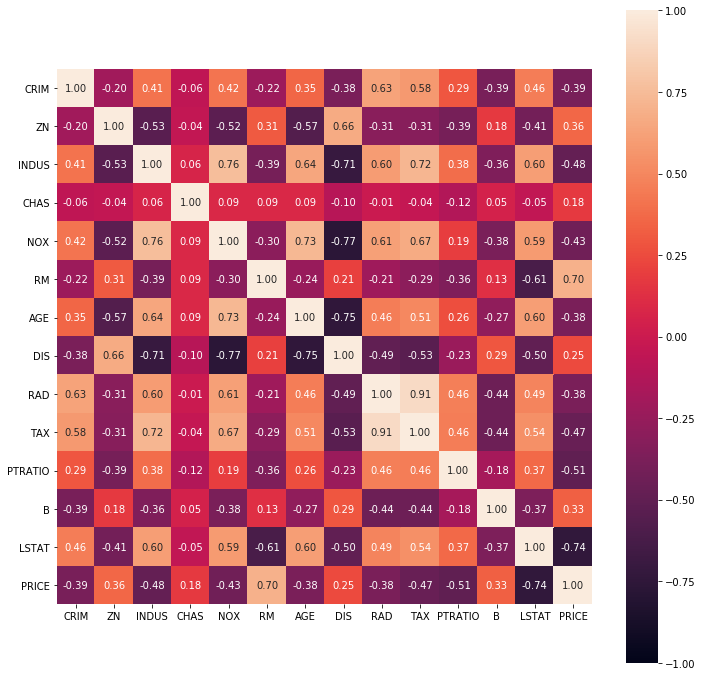

In [80]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

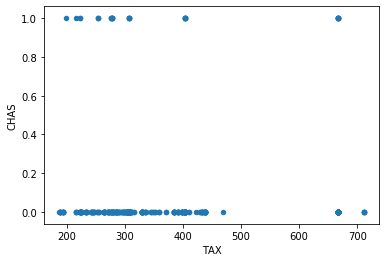

In [88]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

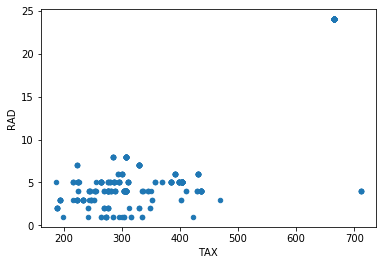

Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin yüksek korelasyona sahip olup değerinin 0.91'dir. Yani emlak vergi oranları ile otoyollara erişebilirlik indexi arasında pozitif korelasyon vardır.


In [91]:
# python kodu buraya
df.plot.scatter("TAX","RAD")
plt.show()

print("Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin yüksek korelasyona sahip olup değerinin 0.91'dir. Yani emlak vergi oranları ile otoyollara erişebilirlik indexi arasında pozitif korelasyon vardır.")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

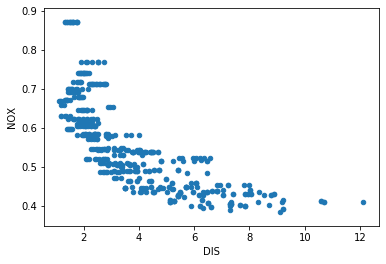

Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin negatif korelasyona sahip olup değerinin -0.77'dir. Yani istihdam merkezine ağırlıklı yakınlık ile nitrik asit konsantrasyonu arasında negatif korelasyon vardır.


In [93]:
# python kodu buraya
df.plot.scatter("DIS", "NOX")
plt.show()

print("Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin negatif korelasyona sahip olup değerinin -0.77'dir. Yani istihdam merkezine ağırlıklı yakınlık ile nitrik asit konsantrasyonu arasında negatif korelasyon vardır.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

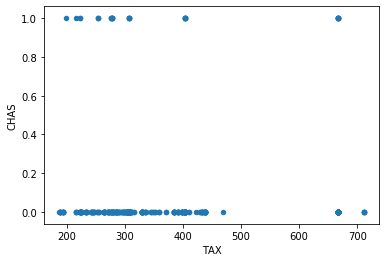

Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin negatif korelasyona sahip olup değerinin -0.04'dir.Yani emlak vergi oranları ile yolun nehri sıfırlayıp(1) ya da sıfırlamayıp (0) olduğunu belirten değişken arasında negatif korelasyon vardır.


In [95]:
# python kodu buraya
df.plot.scatter("TAX", "CHAS")
plt.show()

print("Yukarıda heatmap üzerinde korelasyon değerlerini incelediğimde ele aldığım iki değikenin negatif korelasyona sahip olup değerinin -0.04'dir.Yani emlak vergi oranları ile yolun nehri sıfırlayıp(1) ya da sıfırlamayıp (0) olduğunu belirten değişken arasında negatif korelasyon vardır.")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

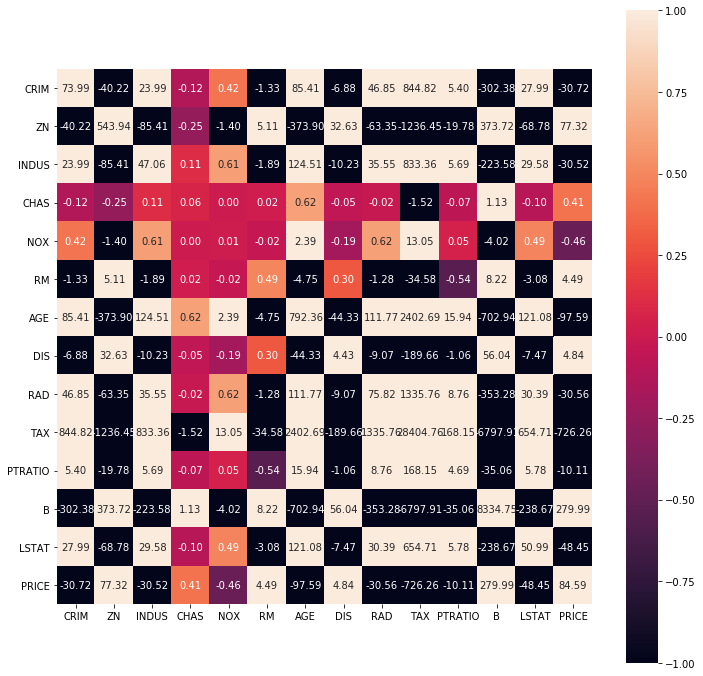

In [96]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

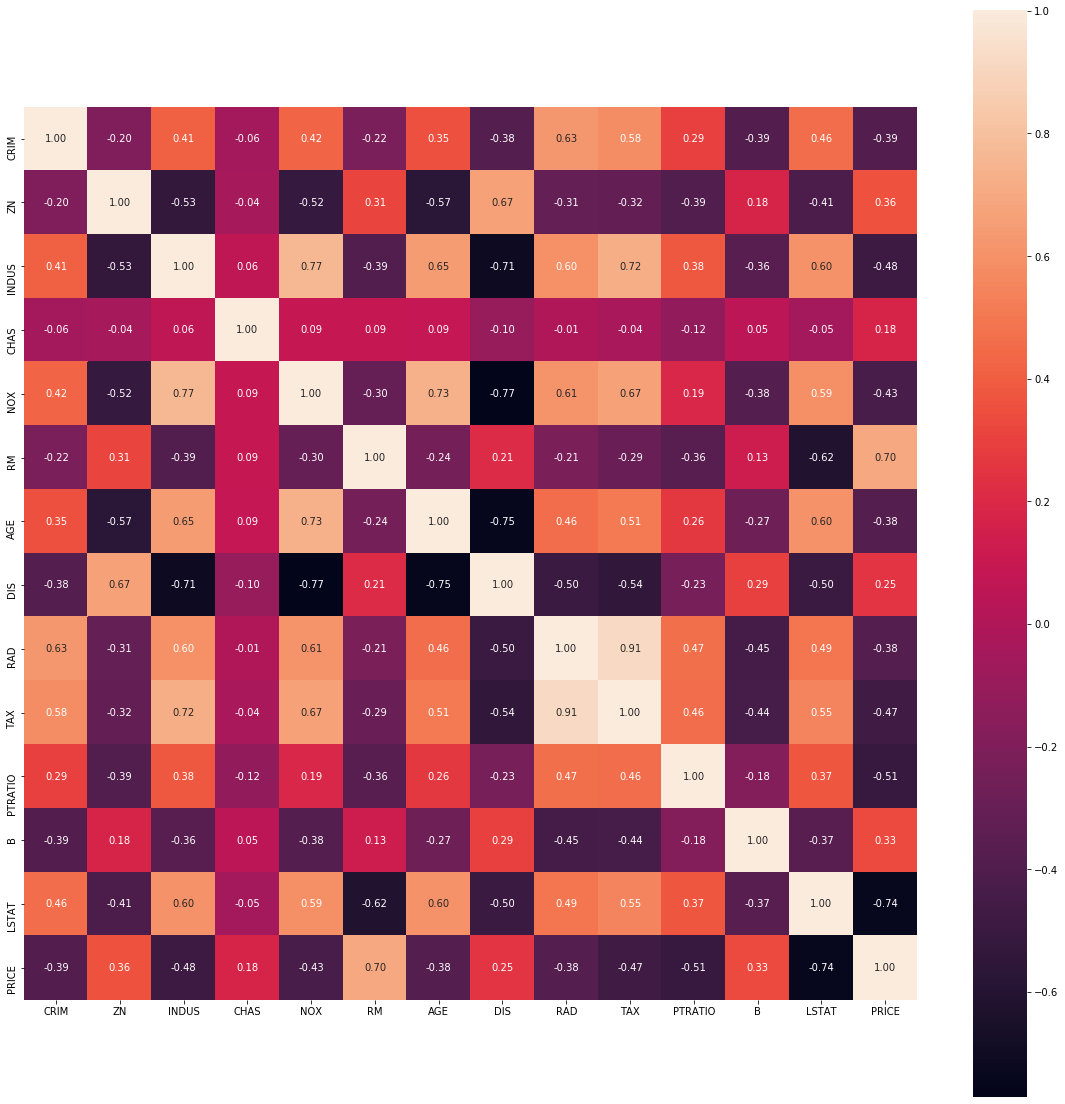

In [114]:
# Heatmap için python kodunu bu hücreye yazın
from sklearn import preprocessing 
std_scaler = preprocessing.StandardScaler()
std_df = scaler.fit_transform(df)
df_stdsc = pd.DataFrame(std_df, columns = df.columns)
plt.figure(figsize=(20,20))
sns.heatmap(df_stdsc.cov(), square=True, annot=True, fmt='.2f')
plt.show()

# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)